In [3]:
results = {

    "Externality Mushrooms - Scenario 1": {
        "GPT4o-Mini": {
            "generative_agents": [
                14.4,
                22.55,
                24.2,
                18.35,
                16.25,
                32.3,
                10.3,
                21.05,
                12.35,
                5.0
            ],
            "cot_agent": [
                9.6,
                5.1,
                11.95,
                23.3,
                20.75,
                16.1,
                6.2,
                18.15,
                14.8,
                23.6
            ]
        },
        "GPT4o": {
            "generative_agents": [
                7.2,
                6.2,
                21.1,
                24.85,
                31.55,
                2.6,
                12.75,
                25.75,
                10.8,
                28.75
            ],
            "cot_agent": [
                26.35,
                1.8,
                17.5,
                9.15,
                11.65,
                12.55,
                5.0,
                11.2,
                14.1,
                9.0
            ]
        },
        "BaseLine": {
            "Meltingpot": [
                9.515864759,
                9.772210377,
                9.853513703,
                8.705473098,
                8.989089184,
                7.784704519,
                42.44193548,
                10.36856801,
                9.565817449,
                8.978874068,
                8.389238845,
                7.167383513,
                7.480203237,
                12.31393855,
                11.18722784,
                11.66918489
            ]
        }
    },
    "Coins - Scenario 1": {
        "GPT4o-Mini": {
            "cot_agent": [
                20,
                45,
                41,
                50,
                25,
                -13,
                17,
                35,
                36,
                18
            ],
            "generative_agents": [
                36,
                33,
                37,
                43,
                -9,
                11,
                50,
                28,
                47,
                36
            ]
        },
        "GPT4o": {
            "cot_agent": [
                60,
                -12,
                26,
                29,
                11,
                14,
                29,
                60,
                -5,
                12
            ],
            "generative_agents": [
                54,
                34,
                42,
                16,
                48,
                57,
                28,
                14,
                27,
                18
            ]
        },
        "BaseLine": {
            "Meltingpot": [
                17.717273952400003,
                18.109239904800003,
                18.4141496616,
                31.3945238112,
                30.926524921600002,
                31.723534084,
                18.0107096796,
                18.136365434000002,
                18.3427264416,
                31.1817594836,
                30.681041754,
                30.485298012399998,
                17.1215693616,
                17.837263580400002,
                17.2995656108
            ]
        }
    },
    "Commons Harvest - Scenario 1": {
        "GPT4o-Mini": {
            "generative_agents": [
                7.8,
                9.4,
                7.8,
                8.2,
                8.4,
                9.2,
                7.4,
                10.8,
                8.6,
                8.4
            ],
            "cot_agent": [
                3.0,
                5.4,
                9.0,
                5.0,
                7.6,
                7.8,
                4.8,
                5.2,
                7.0,
                6.2
            ]
        },
        "BaseLine": {
            "Meltingpot": [
                10.28994709,
                10.1135376,
                10.39208633,
                10.76997539,
                10.7430223,
                11.55376261,
                10.67341772,
                10.00926984,
                9.814327657,
                10.11118922,
                6.675783972,
                6.410152838,
                7.794463668,
                10.746139,
                11.05280289
            ]
        }
    }
}

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
def create_box_plot(ax, results, subcat_colors, norm_across_cats=False, show_legend=False, **kwargs):
    """
    Creates a box plot with the results of the indicators
    The results are a dictionary with (categories) as keys and as values a dictionary with subcategories as keys and a list with the values for each simulation

    Parameters:
    results (dict): The results of the indicators
    subcat_colors (list): A list with the colors for each subcategory. Each element is a dictionary with the facecolor and the color
    norm_across_cats (bool): If True, the values will be normalized across categories
    **kwargs: Additional parameters for the plot. title and ylabel are supported
    """
    categories = list(results.keys())
    categories = ['generative_agents', 'cot_agent']
    try:
        # subcategories = list(results[categories[0]].keys())
        subcategories = ['GPT4o', 'GPT4o-Mini']
        if 'subcategories' in kwargs:
            subcategories = kwargs['subcategories']

    except:
        # If there are is an exception is because the data has no categories
        subcategories = categories
        categories = None
        

    if norm_across_cats and categories is not None:
        results = np.array(list(map(lambda x: list(x.values()), results.values()))) # 3 dimensions: categories, subcategories, simulations
        # Mask to avoid division by zero
        mask = results.sum(axis=0, keepdims=True) == 0
        results = results/(results.sum(axis=0, keepdims=True)+mask)

    cat_width = 2
    subcat_width = 1
    offset = 0.5
    offset_ = (cat_width + offset)/2
    if categories is None:
        positions = np.arange(len(subcategories))+1
    else:
        # positions = np.arange(len(categories)*len(subcategories))+1
        positions = np.array([offset + cat_width*c + subcat_width*s for c in np.arange(len(categories)) for s in np.arange(len(subcategories))])
    if 'scale_xticks' in kwargs:
        positions = positions*kwargs['scale_xticks']
    if 'xticks_translation' in kwargs:
        positions += kwargs['xticks_translation']

    # fig, ax = plt.subplots(**kwargs.get('subplots_kwargs',{}))
    print('categories:', categories)
    print('subcategories:', subcategories)
    print('positions', positions)
    for s, subcategory in enumerate(subcategories):
        boxprops = subcat_colors[s].copy()
        if categories is not None:
            if norm_across_cats:
                data = [results[c][s] for c in range(len(categories))]
            else:
                data = [results[subcategory][c] if c in results[subcategory] else [] for c in categories]
        else:
            # data = results[s]
            data = results[subcategory]
        
        ax.boxplot(data, positions=positions[s::len(subcategories)], patch_artist=True, boxprops=boxprops, showmeans=True, widths=(0.5, 0.5))
    
    ax.boxplot(results['BaseLine']['Meltingpot'], positions=[2*cat_width+offset_], patch_artist=True, boxprops={'facecolor': 'xkcd:light periwinkle', 'color': 'xkcd:purplish blue'}, showmeans=True, widths=(0.5))

    if categories is not None:
        ax.set_xticks((np.arange(len(kwargs['xticks_names']))*cat_width) + offset_ if 'xticks_names' in kwargs else positions[::len(subcategories)], kwargs['xticks_names'] if 'xticks_names' in kwargs else categories, rotation=30)
    else:
        ax.set_xticks(positions, kwargs['xticks_names'] if 'xticks_names' in kwargs else subcategories, rotation=30)

    if 'title' in kwargs:
        ax.set_title(kwargs['title'], fontdict={'fontsize': 10})
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])

    if categories is not None and show_legend:
        legend_elements = [Patch(facecolor=subcat_colors[i]['facecolor'], edgecolor=subcat_colors[i]['color'], \
                                label=subcategory) for i, subcategory in enumerate(subcategories)]
        legend_elements += [Patch(facecolor='xkcd:light periwinkle', edgecolor='xkcd:purplish blue', label='MeltingPot')]
        ax.legend(handles=legend_elements, loc='upper left')

    return ax

categories: ['generative_agents', 'cot_agent']
subcategories: ['GPT4o', 'GPT4o-Mini']
positions [0.5 1.5 2.5 3.5]
categories: ['generative_agents', 'cot_agent']
subcategories: ['GPT4o', 'GPT4o-Mini']
positions [0.5 1.5 2.5 3.5]
categories: ['generative_agents', 'cot_agent']
subcategories: ['GPT4o-Mini']
positions [0.5 2.5]


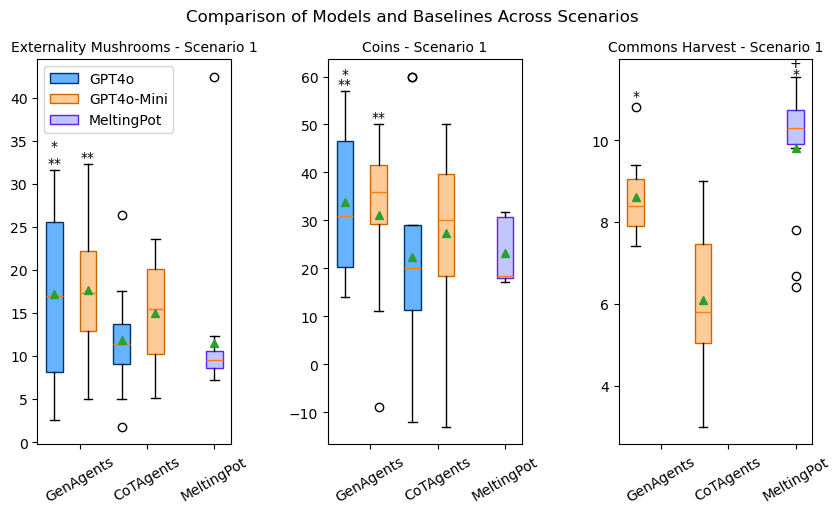

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Comparison of Models and Baselines Across Scenarios')

ax = axs[0]
subcat_colors = [
        {"facecolor": "#66b3ff", "color": "#003366"},   # GPT4o (CoTAgents y GenAgents)
        {"facecolor": "#ffcc99", "color": "#cc6600"},  # GPT4o-mini (CoTAgents y GenAgents)
        {'facecolor': 'aquamarine', 'color': 'royalblue'}, # Llama 70b
        {'facecolor': 'lightgreen', 'color': 'royalblue'}, # Llama 8b
        {'facecolor': 'xkcd:light periwinkle', 'color': 'xkcd:purplish blue', 'alpha': 1}, # MeltingPot
    ]
ax = create_box_plot(ax, results['Externality Mushrooms - Scenario 1'], subcat_colors,
                xticks_names=['GenAgents', 'CoTAgents', 'MeltingPot'],
                title = 'Externality Mushrooms - Scenario 1',
                show_legend=True
                )
significant_results = [
    (0.5, max(results['Externality Mushrooms - Scenario 1']['GPT4o']['generative_agents']), '**'),
    (0.5, max(results['Externality Mushrooms - Scenario 1']['GPT4o']['generative_agents'])+2, '*'),
    (1.5, max(results['Externality Mushrooms - Scenario 1']['GPT4o-Mini']['generative_agents']), '**'),
    ]
for sig in significant_results:
    ax.text(sig[0], sig[1], sig[2], fontsize=10, color='black', ha='center', va='bottom')
# ax.set_xlim(0.3, 6)

ax = axs[1]
ax = create_box_plot(ax, results['Coins - Scenario 1'], subcat_colors,
                xticks_names=['GenAgents', 'CoTAgents', 'MeltingPot'],
                title = 'Coins - Scenario 1'
                )
significant_results = [
    (0.5, max(results['Coins - Scenario 1']['GPT4o']['generative_agents']), '**'),
    (0.5, max(results['Coins - Scenario 1']['GPT4o']['generative_agents'])+2, '*'),
    (1.5, max(results['Coins - Scenario 1']['GPT4o-Mini']['generative_agents']), '**'),
    ]
for sig in significant_results:
    ax.text(sig[0], sig[1], sig[2], fontsize=10, color='black', ha='center', va='bottom')
# ax.set_xlim(0.3, 6)

ax = axs[2]
subcat_colors = [
        # {"facecolor": "#66b3ff", "color": "#003366"},   # GPT4o (CoTAgents y GenAgents)
        {"facecolor": "#ffcc99", "color": "#cc6600"},  # GPT4o-mini (CoTAgents y GenAgents)
        {'facecolor': 'aquamarine', 'color': 'royalblue'}, # Llama 70b
        {'facecolor': 'lightgreen', 'color': 'royalblue'}, # Llama 8b
        {'facecolor': 'xkcd:light periwinkle', 'color': 'xkcd:purplish blue', 'alpha': 1}, # MeltingPot
    ]
ax = create_box_plot(ax, results['Commons Harvest - Scenario 1'], subcat_colors,
                xticks_names=['GenAgents', 'CoTAgents', 'MeltingPot'],
                subcategories=['GPT4o-Mini'],
                title = 'Commons Harvest - Scenario 1'
                )
significant_results = [
    (5.25, max(results['Commons Harvest - Scenario 1']['BaseLine']['Meltingpot'])+0.15, '+'),
    (5.25, max(results['Commons Harvest - Scenario 1']['BaseLine']['Meltingpot'])-0.1, '*'),
    (0.5, max(results['Commons Harvest - Scenario 1']['GPT4o-Mini']['generative_agents'])+0.1, '*'),
    ]
for sig in significant_results:
    ax.text(sig[0], sig[1], sig[2], fontsize=10, color='black', ha='center', va='bottom')
# ax.set_xlim(0.3, 6)